# Explore Convolution Parameters:

---

### Load libraries, filenames, and paths:

In [1]:
import sys
sys.path.append('core')
from hydromet import*

file = 'DC_P01.json'
root_dir = pl.Path(os.getcwd())
output_dir = root_dir/'Outputs'

duration = 24 # Hours
BCN = 'D01'

### Load data

In [4]:
with open(output_dir/file) as f:
    EventsTable = json.load(f)

dur =  'H{}'.format(str(duration).zfill(2))
events = pd.DataFrame.from_dict(EventsTable[dur]['BCName'][BCN])
events['hours'] = EventsTable[dur]['time_idx']
events = events.set_index('hours')
events.head(2)

,E2001,E2002,E2003,E2004,E2005,E2006,E2007,E2008,E2009,E2010,...,E2422,E2423,E2424,E2425,E2426,E2427,E2428,E2429,E2430,E2431
hours,,,,,,,,,,,,,,,,,,,,,
0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2.0,0.045131,0.030766,0.021614,0.006797,0.085396,0.018648,0.10523,0.08901,0.011862,0.013333,...,0.00262,0.001364,0.024122,0.083508,0.005366,0.002281,0.046863,0.078757,1.510144,1.875603


### Specify convolution parameters:
- __tempEpsilon__: The number of hours over which to resample the excess rainfall event time-series. This smooths-out high temporal frequency variability, which means more curves will be considered similiar to eachother. 

- __tempEpsilon__:
- __convEpsilon__:
- __volEpsilon__:

In [5]:
tempEpsilon = 4 
tempEpsilon2 = 2 
convEpsilon = 133.33  
volEpsilon = 67  

### Plot the excess rainfall:

Text(0.5, 1.0, 'Excess Rainfall')

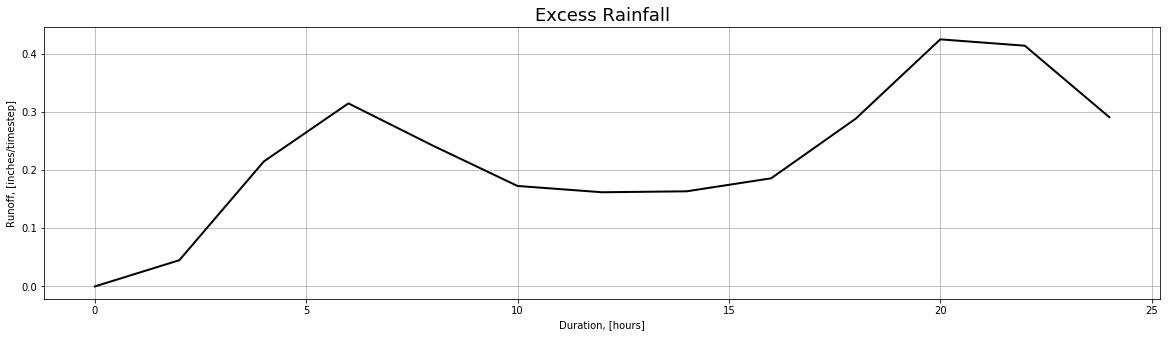

In [6]:
fig, ax = plt.subplots(figsize=(20,5))
ax.plot(events.index, events['E2001'], color='black', linewidth='2', label='')    
ax.grid()
ax.set_xlabel('Duration, [hours]')
ax.set_ylabel('Runoff, [inches/timestep]')
ax.set_title('Excess Rainfall', size = 18)

#### Visualize tempEpsilon:

In [ ]:
adj_tempEpsilon = convert_tempEpsilon(tempEpsilon, events)
print('{0} hours is {1} timesteps'.format(tempEpsilon, adj_tempEpsilon))

In [ ]:
events_resampled = prep_data_for_convolution(events, adj_tempEpsilon)
events_resampled.head(2)

In [ ]:
idx = np.arange(0,24+4,4)
idx

In [ ]:
fig, ax = plt.subplots(figsize=(20,5))
ax.plot(events.index, events['E2001'], color='black', linewidth='2', label='')    
ax.plot(idx, np.insert(list(events_resampled['E2001']),0,0), color='green', linewidth='2', label='tempEpsilon = {}'.format(tempEpsilon))    
ax.grid()
ax.set_xlabel('Duration, [hours]')
ax.set_ylabel('Runoff, [inches/timestep]')
ax.set_title('Excess Rainfall', size = 18)
ax.legend()    

In [9]:
x = np.arange(1,8)

v1 = 1.0

for i in x:
    v2 = i
    pdiff = np.abs(v1-v2)/((v1+v2)/2)*100.0
    print('Value1 is {}x value2,'.format(i), 'Epsilon:',np.around(pdiff,2))

Value1 is 1x value2, Epsilon: 0.0
Value1 is 2x value2, Epsilon: 66.67
Value1 is 3x value2, Epsilon: 100.0
Value1 is 4x value2, Epsilon: 120.0
Value1 is 5x value2, Epsilon: 133.33
Value1 is 6x value2, Epsilon: 142.86
Value1 is 7x value2, Epsilon: 150.0
